In [12]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2023, 5, 16)

cities = {'Shanghai':[31.224361,121.469170],
          'Crevalcore':[44.721573,11.150963]
          }

###############################################################

data = pd.DataFrame()

for key, value in cities.items():
    print(key, '->', value)
    city = Point(value[0],#lat 
             value[1],#long
             20 # m height
             )
    # Get daily data for 2018
    data1 =Daily(city, start, end)
    data1 = data1.fetch()
    data1['city'] = key
    data=data.append(data1,ignore_index=False)
    

data.to_csv('test.csv')
print('Done!')
data

Shanghai -> [31.224361, 121.46917]
Crevalcore -> [44.721573, 11.150963]
Done!


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2020-01-01,8.4,-0.1,10.9,0.3,NaN,88.0,8.9,NaN,1032.3,NaN,Shanghai
2020-01-02,11.0,8.9,12.9,0.3,NaN,117.0,8.9,NaN,1028.0,NaN,Shanghai
2020-01-03,10.0,9.9,10.9,2.8,NaN,354.0,8.6,NaN,1026.5,NaN,Shanghai
2020-01-04,10.2,8.9,10.9,1.3,NaN,34.0,11.6,NaN,1026.2,NaN,Shanghai
2020-01-05,13.3,9.9,13.9,0.0,NaN,109.0,16.5,NaN,1025.5,NaN,Shanghai
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12,14.0,10.1,18.1,3.8,NaN,329.0,8.7,NaN,1012.7,NaN,Crevalcore
2023-05-13,14.6,11.1,18.1,2.8,NaN,61.0,9.2,NaN,1016.2,NaN,Crevalcore
2023-05-14,14.0,12.1,16.1,16.0,NaN,297.0,8.1,NaN,1012.0,NaN,Crevalcore


In [13]:
data.groupby('city').count()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
city,,,,,,,,,,
Crevalcore,1228,1228,1228,860,0,1228,1228,0,1228,0
Shanghai,1232,1232,1232,1079,31,1232,1232,0,1232,0


In [17]:
df = data[data['city']=='Shanghai']

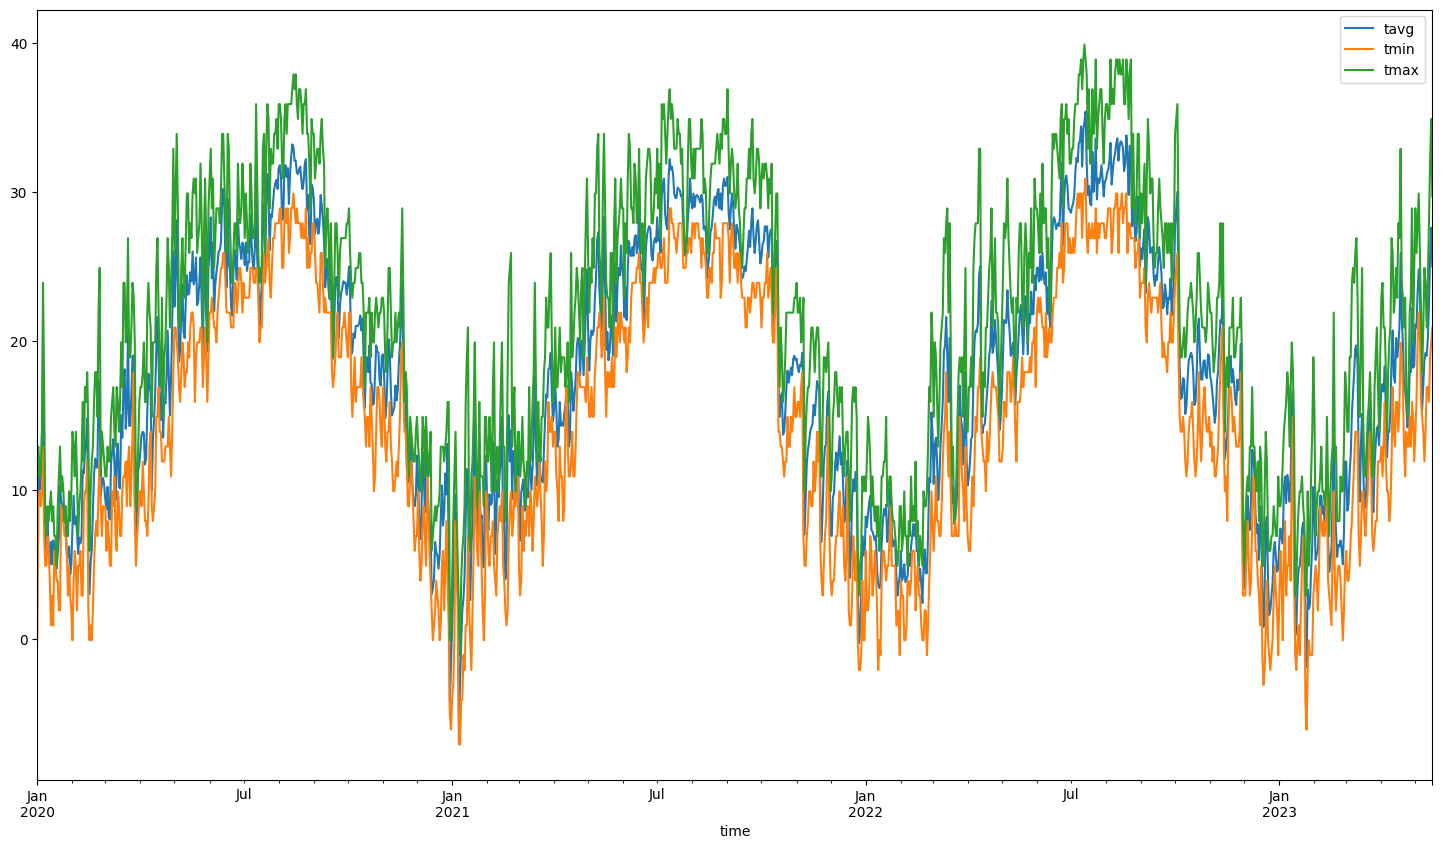

In [18]:
# Plot line chart including average, minimum and maximum temperature
df.plot(y=['tavg', 'tmin', 'tmax'],figsize=(18,10))
plt.show()

In [19]:
### ZOOM 

import plotly.graph_objects as go
fig = go.Figure()

#Actual 
fig.add_trace(go.Scatter(x = df.index, 
                         y = df['tavg'],
                         mode = "lines",
                         name = "Aveg",
                         line_color='#0000FF',
                         ))
##############################################################
#Predicted 
fig.add_trace(go.Scatter(x = df.index, 
                         y = df['tmax'],
                         mode = "lines", 
                         name = "Max",
                         line_color='#ff8c00',
                         ))

##############################################################
# adjust layout
fig.update_layout(title = "Titolo",
                  xaxis_title = "Date",
                  yaxis_title = "Sales",
                  width = 1700,
                  height = 700,
                  )
####################################################################
# zoomming
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0000FF'},
              'mode': 'lines',
              'name': 'Aveg',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 2, 0, 0),
                          datetime.datetime(2020, 1, 3, 0, 0), ...,
                          datetime.datetime(2023, 5, 14, 0, 0),
                          datetime.datetime(2023, 5, 15, 0, 0),
                          datetime.datetime(2023, 5, 16, 0, 0)], dtype=object),
              'y': array([ 8.4, 11. , 10. , ..., 25.7, 27.6, 25. ])},
             {'line': {'color': '#ff8c00'},
              'mode': 'lines',
              'name': 'Max',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 2, 0, 0),
                          datetime.datetime(2020, 1, 3, 0, 0), ...,
                          datetime.datetime(2023, 5, 14, 0, 0),
                          datetime.datetime(2023, 5, 15, 0, 0),
                          datetime.datetime(2023, 5, 16, 0, 0)], dtype=object),
              'y': array([10.9, 12.9, 10.9, ..., 31.9, 34.9, 29.7])}],
    'layout': {'height': 700,
               'template': '...',
               'title': {'text': 'Titolo'},
               'width': 1700,
               'xaxis': {'rangeselector': {'buttons': [{'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'count': 2, 'label': '3y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'count': 10,
                                                        'label': '10y',
                                                        'step': 'year',
                                                        'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'Date'}},
               'yaxis': {'title': {'text': 'Sales'}}}
})